# Step#0: Problem Statement:
- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# Step#1: Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle #to perform serialization of data
import random

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open(r"C:\Users\mmanasanjani\Desktop\Extra\MK\RWMLP\Project 5\traffic-signs-data\train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open(r"C:\Users\mmanasanjani\Desktop\Extra\MK\RWMLP\Project 5\traffic-signs-data\valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open(r"C:\Users\mmanasanjani\Desktop\Extra\MK\RWMLP\Project 5\traffic-signs-data\test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train,y_train=train['features'],train['labels']
X_validation,y_validation=valid['features'],valid['labels']
X_test,y_test=test['features'],test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

# Step#2: Image Exploration/Data Visualization

36

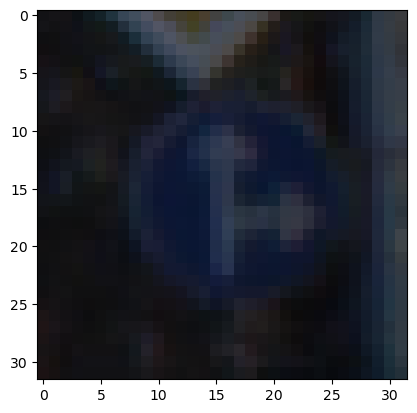

In [10]:
i=1000
plt.imshow(X_train[i])
y_train[i]

37

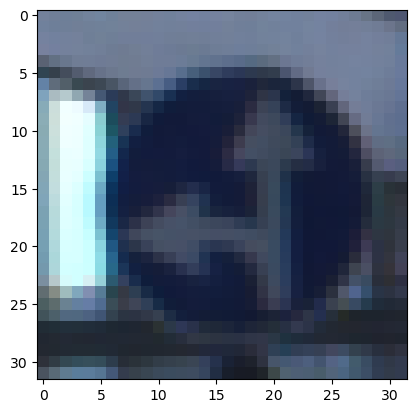

In [11]:
i=5000
plt.imshow(X_train[i])
y_train[i]

15

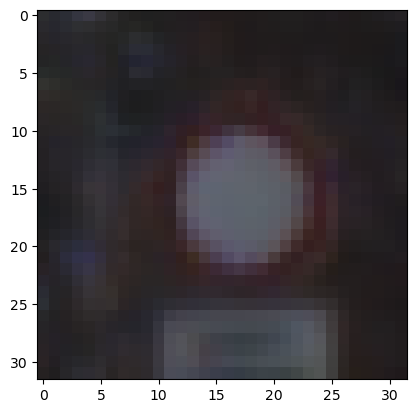

In [12]:
i=30000
plt.imshow(X_train[i])
y_train[i]

41

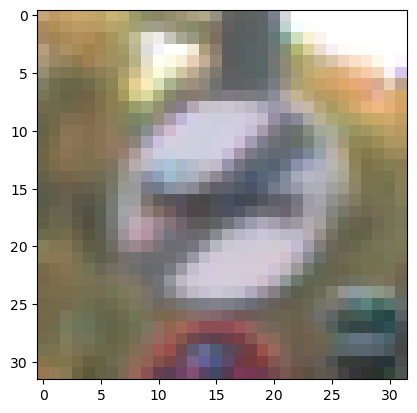

In [13]:
i=100
plt.imshow(X_train[i])
y_train[i]

23

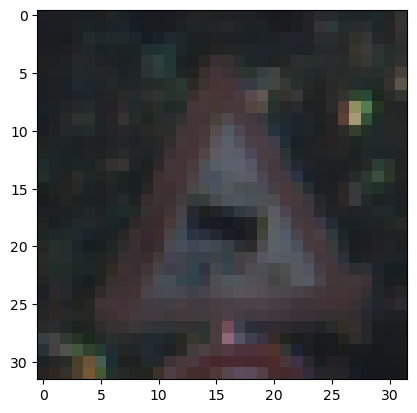

In [14]:
i=2000
plt.imshow(X_train[i])
y_train[i]

1

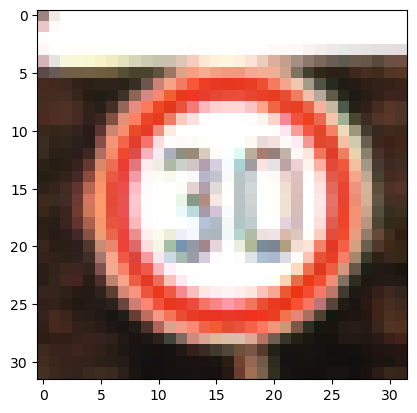

In [15]:
i=3000
plt.imshow(X_train[i])
y_train[i]

7

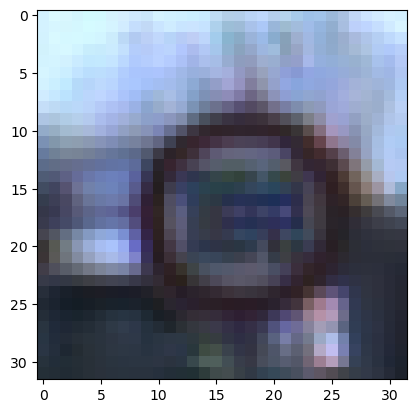

In [16]:
i=3000
plt.imshow(X_validation[i])
y_validation[i]

34

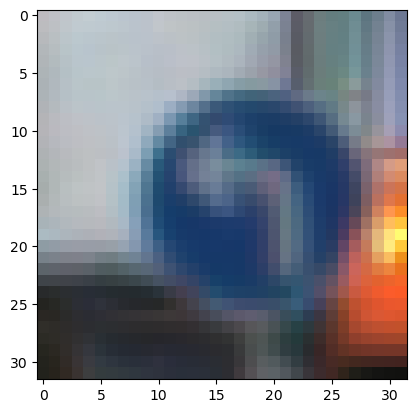

In [17]:
i=2000
plt.imshow(X_test[i])
y_test[i]

# Step#3: Data Preparation

In [18]:
# perform shuffling for better training
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [19]:
X_train_gray=np.sum(X_train/3, axis=3, keepdims=True) #keep dimensions--> place only 1 image instead of 3

In [20]:
X_train_gray

array([[[[ 67.66666667],
         [ 35.        ],
         [ 33.33333333],
         ...,
         [ 72.66666667],
         [ 62.        ],
         [ 54.        ]],

        [[ 40.33333333],
         [ 32.33333333],
         [ 34.33333333],
         ...,
         [ 63.33333333],
         [ 59.33333333],
         [ 48.33333333]],

        [[ 38.66666667],
         [ 29.33333333],
         [ 29.        ],
         ...,
         [ 55.66666667],
         [ 53.33333333],
         [ 48.        ]],

        ...,

        [[ 26.66666667],
         [ 25.        ],
         [ 27.33333333],
         ...,
         [ 39.        ],
         [ 35.33333333],
         [ 35.33333333]],

        [[ 27.        ],
         [ 25.66666667],
         [ 25.66666667],
         ...,
         [ 42.33333333],
         [ 39.66666667],
         [ 38.        ]],

        [[ 26.33333333],
         [ 27.33333333],
         [ 25.66666667],
         ...,
         [ 41.        ],
         [ 40.66666667],
         [ 37.333

In [21]:
X_train_gray.shape

(34799, 32, 32, 1)

In [22]:
#do the same for testing, validation
X_test_gray=np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray=np.sum(X_validation/3, axis=3, keepdims=True)

In [23]:
X_test_gray.shape

(12630, 32, 32, 1)

In [24]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [25]:
X_train_gray_norm=(X_train_gray-128)/128 #normalizing training data
X_test_gray_norm=(X_test_gray-128)/128 #normalizing test data
X_validation_gray_norm=(X_validation_gray-128)/128 #normalizing validation data

In [26]:
X_train_gray_norm

array([[[[-0.47135417],
         [-0.7265625 ],
         [-0.73958333],
         ...,
         [-0.43229167],
         [-0.515625  ],
         [-0.578125  ]],

        [[-0.68489583],
         [-0.74739583],
         [-0.73177083],
         ...,
         [-0.50520833],
         [-0.53645833],
         [-0.62239583]],

        [[-0.69791667],
         [-0.77083333],
         [-0.7734375 ],
         ...,
         [-0.56510417],
         [-0.58333333],
         [-0.625     ]],

        ...,

        [[-0.79166667],
         [-0.8046875 ],
         [-0.78645833],
         ...,
         [-0.6953125 ],
         [-0.72395833],
         [-0.72395833]],

        [[-0.7890625 ],
         [-0.79947917],
         [-0.79947917],
         ...,
         [-0.66927083],
         [-0.69010417],
         [-0.703125  ]],

        [[-0.79427083],
         [-0.78645833],
         [-0.79947917],
         ...,
         [-0.6796875 ],
         [-0.68229167],
         [-0.70833333]]],


       [[[-0.83333333],


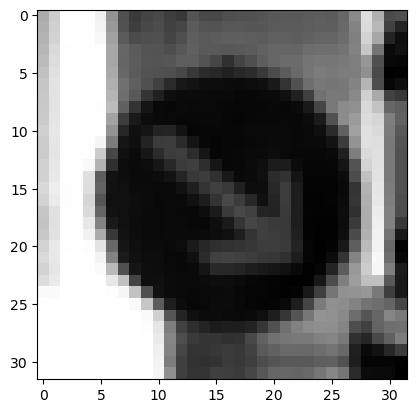

In [27]:
i=610
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')

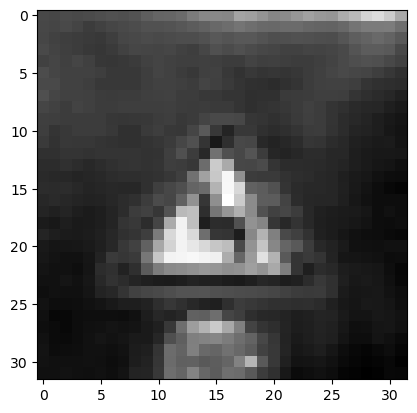

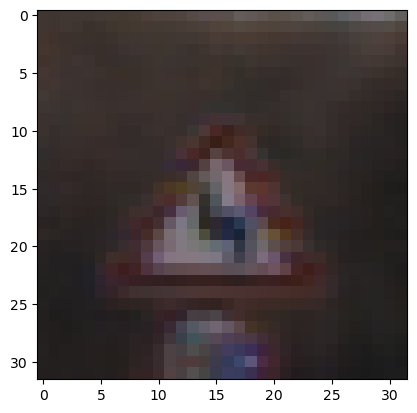

In [28]:
i=630
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])

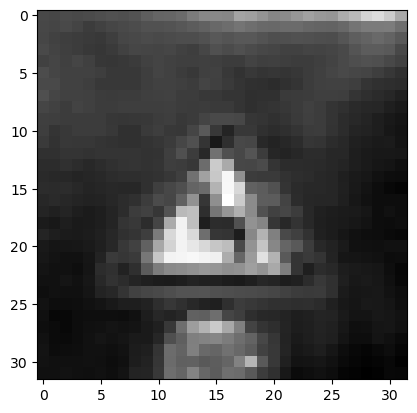

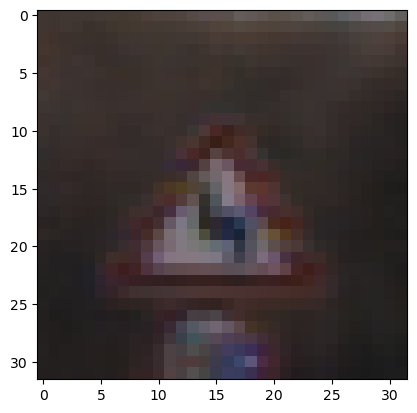

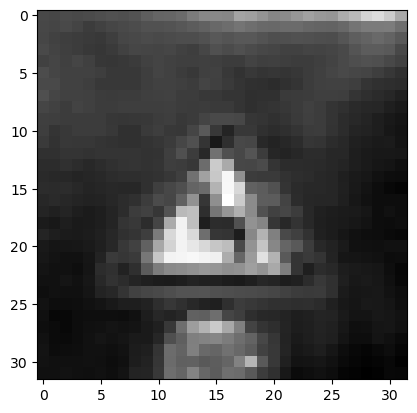

In [29]:
i=630
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray') #squeeze--> to avoid invalid dimensions error

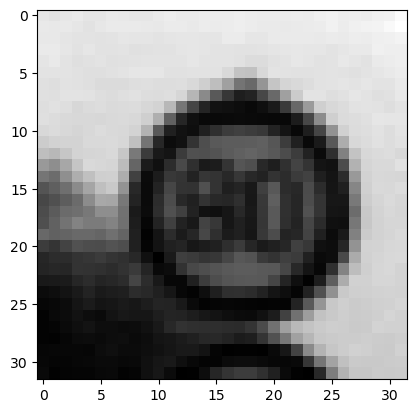

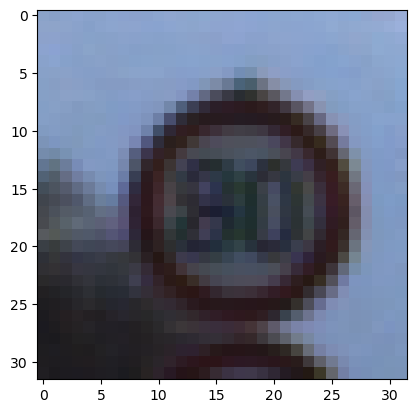

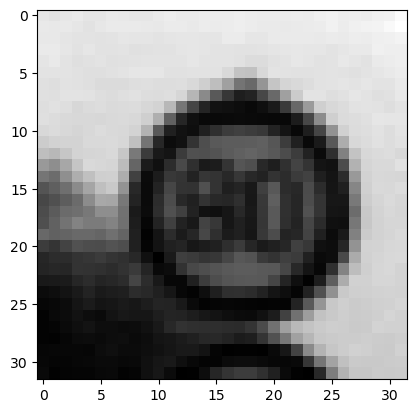

In [30]:
i=630
plt.imshow(X_test_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(),cmap='gray') #squeeze--> to avoid invalid dimensions error

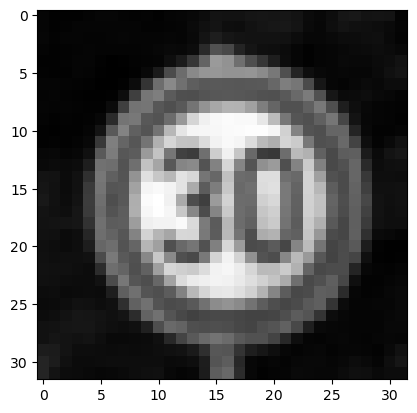

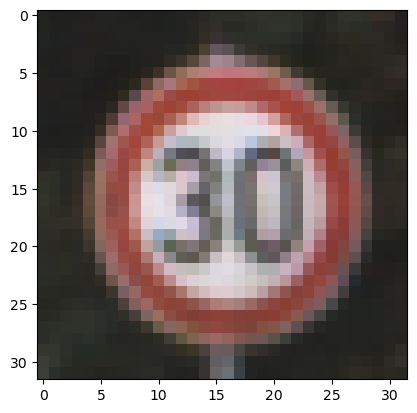

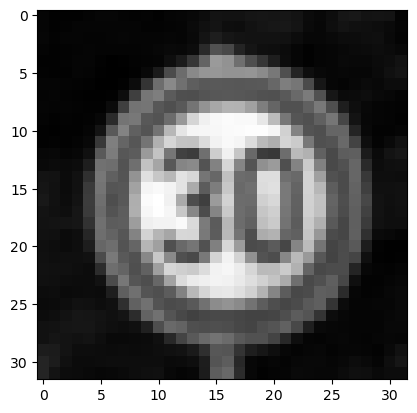

In [31]:
i=499
plt.imshow(X_validation_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(),cmap='gray') #squeeze--> to avoid invalid dimensions error

# Step#4: Model Training
The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [32]:
#using keras API(interface on top of tensorflow)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [33]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu')) #depth of network is 16
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120,activation='relu'))

cnn_model.add(Dense(units=84,activation='relu'))

cnn_model.add(Dense(units=43,activation='softmax')) #output has to be saturated, so softmax

In [34]:
cnn_model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [35]:
history=cnn_model.fit(X_train_gray_norm,y_train,batch_size=500,epochs=50,verbose=1,validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 8s 99ms/step - loss: 3.1840 - accuracy: 0.1776 - val_loss: 2.7458 - val_accuracy: 0.2794
Epoch 2/50
70/70 [==============================] - 9s 125ms/step - loss: 1.7074 - accuracy: 0.5261 - val_loss: 1.4461 - val_accuracy: 0.5551
Epoch 3/50
70/70 [==============================] - 9s 133ms/step - loss: 0.9738 - accuracy: 0.7188 - val_loss: 1.0419 - val_accuracy: 0.6914
Epoch 4/50
70/70 [==============================] - 9s 130ms/step - loss: 0.6967 - accuracy: 0.8050 - val_loss: 0.8274 - val_accuracy: 0.7519
Epoch 5/50
70/70 [==============================] - 9s 123ms/step - loss: 0.5413 - accuracy: 0.8531 - val_loss: 0.7468 - val_accuracy: 0.7764
Epoch 6/50
70/70 [==============================] - 10s 138ms/step - loss: 0.4502 - accuracy: 0.8792 - val_loss: 0.6962 - val_accuracy: 0.8014
Epoch 7/50
70/70 [==============================] - 9s 130ms/step - loss: 0.3795 - accuracy: 0.9011 - val_loss: 0.6665 - val_accuracy: 0.8014
Epoch 

In [36]:
history

# Step#5: Model Evaluation

In [37]:
score=cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 6ms/step - loss: 1.0785 - accuracy: 0.8789
Test Accuracy: 0.8788598775863647


In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

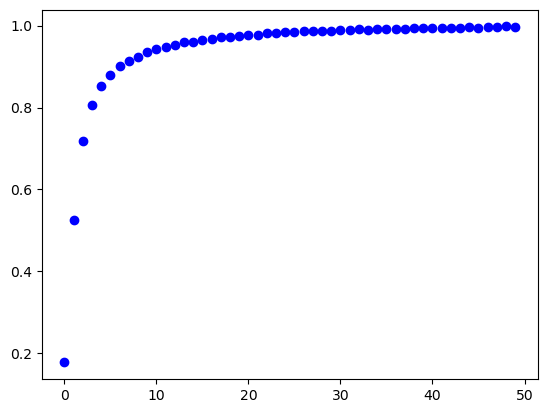

In [40]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')

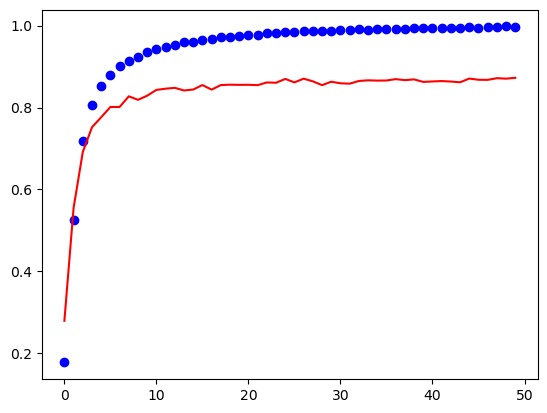

In [44]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation Accuracy')

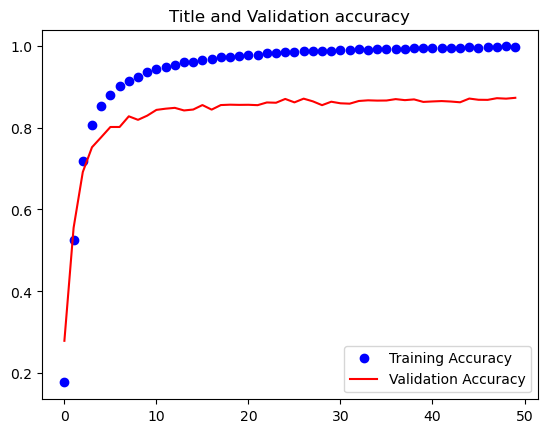

In [46]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation Accuracy')
plt.title('Title and Validation accuracy')
plt.legend()

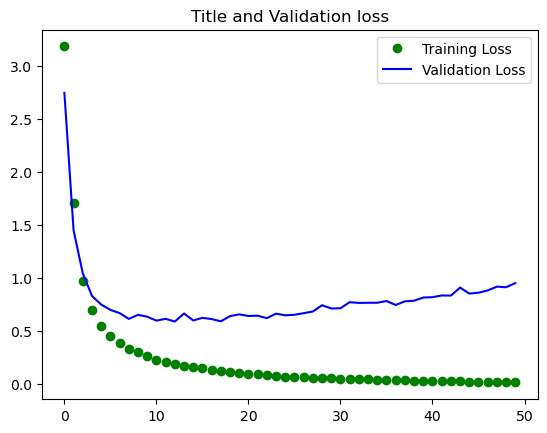

In [47]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'go',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Title and Validation loss')
plt.legend()

In [54]:
predicted_classes=cnn_model.predict(X_test_gray_norm).argmax(axis=-1)

395/395 [==============================] - 2s 4ms/step


In [55]:
y_true=y_test

<Axes: >

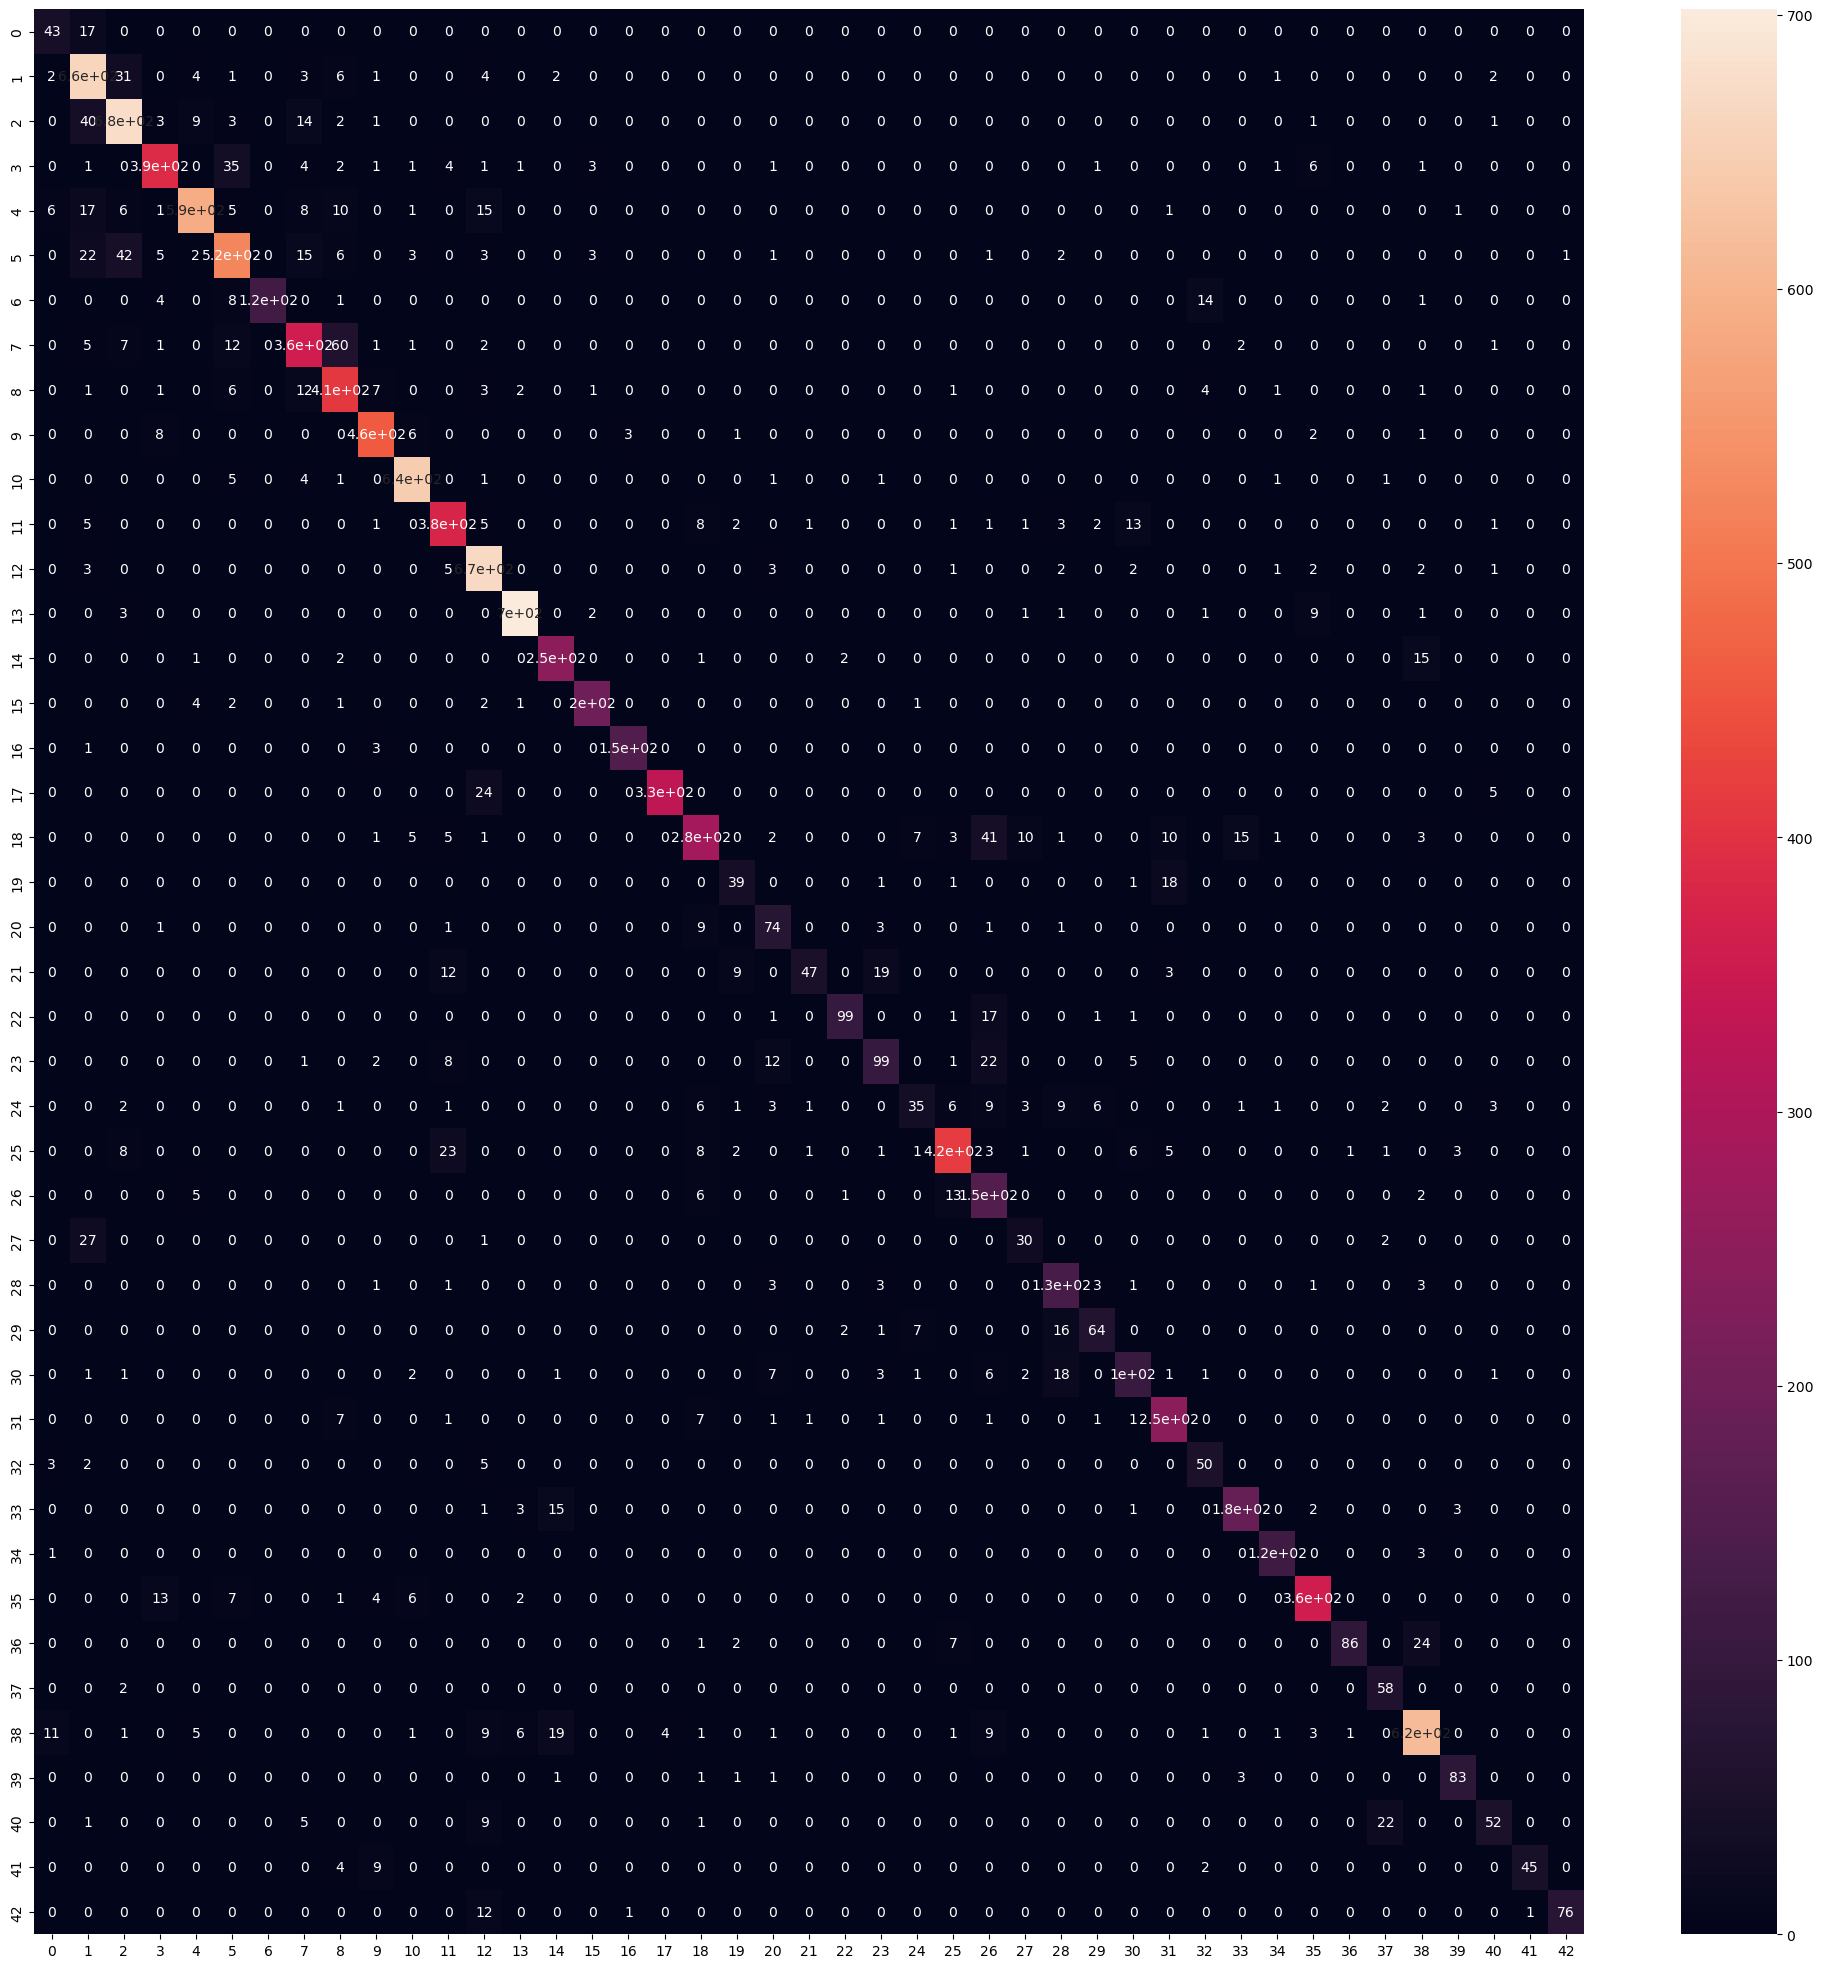

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

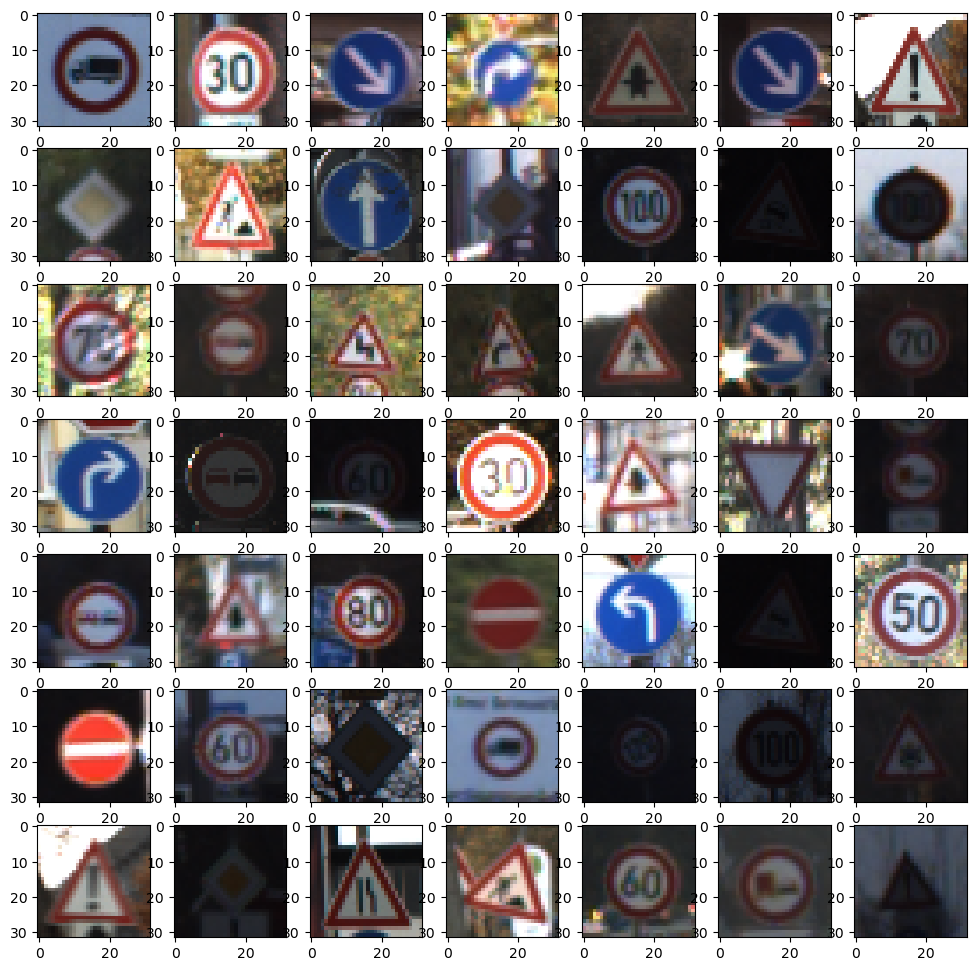

In [62]:
L=7
W=7


fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])

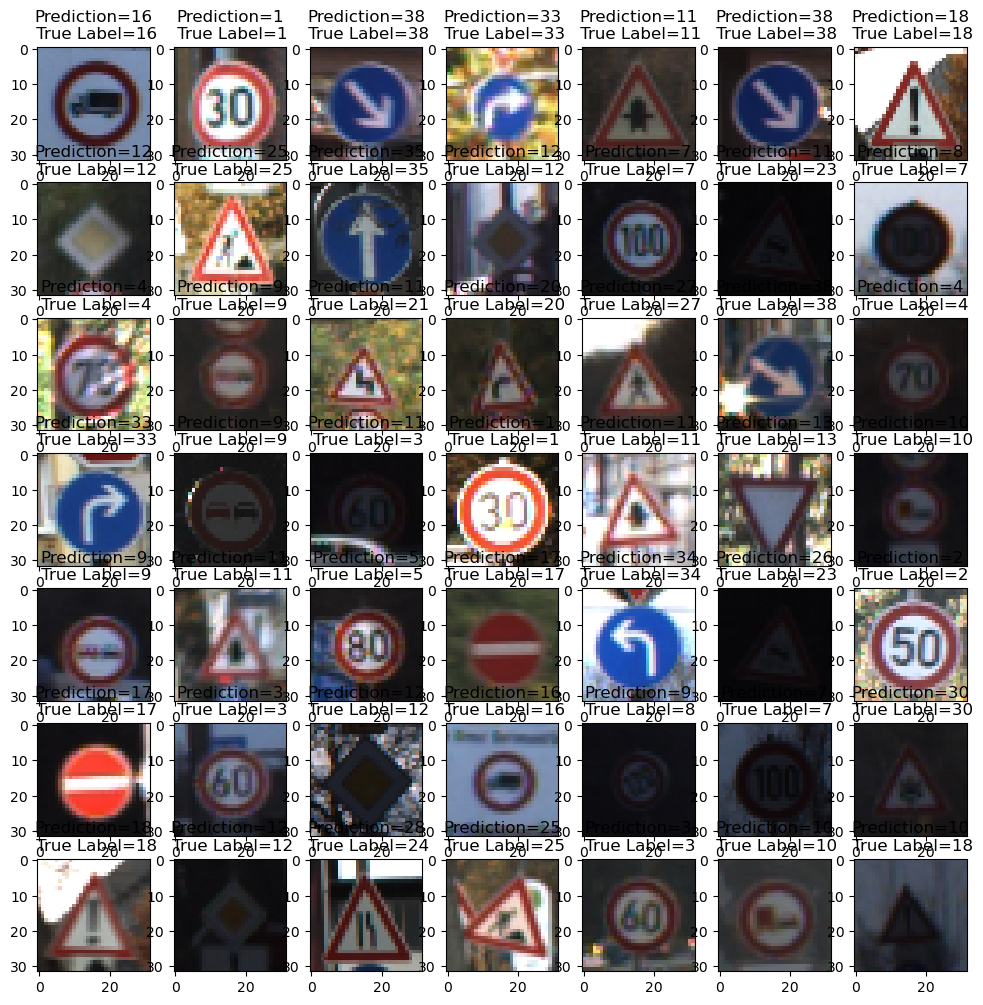

In [63]:
L=7
W=7


fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction={}\n True Label={}'.format(predicted_classes[i],y_true[i]))

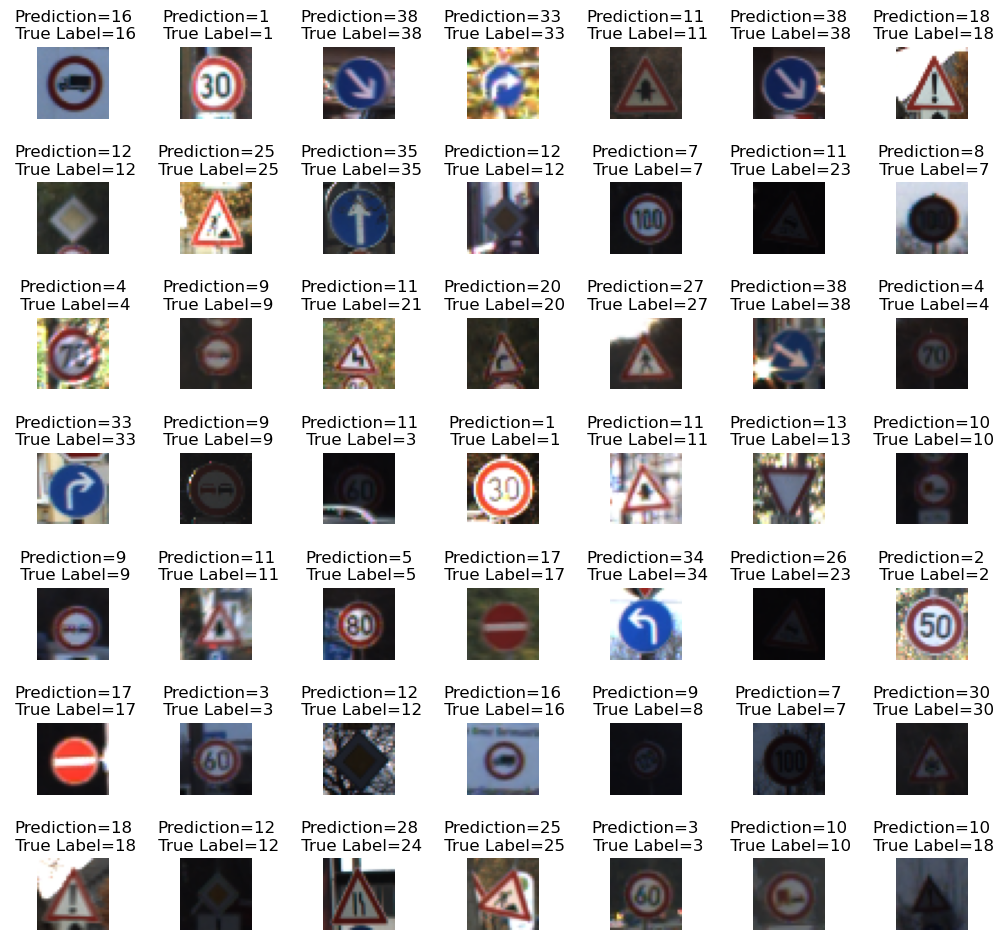

In [65]:
L=7
W=7


fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction={}\n True Label={}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)